# Recipes from food.com - comparison of cuisines

Original idea on a linkedin post by Nicola Rennie

https://www.linkedin.com/posts/nicola-rennie_activity-7373337363122634752


Her original idea was to use ternary plots to display the differences in protein, fat and carbohydrads contents between different cuisines.

I am here testing a german-vs-french version which was not done in the post. We also filter for main dishes, only. 

The result should reflect the following difference between french and german cuisine:
- France (INCA2, adults)  :    ~39% fat,     44% carbs,     17% protein
- Germany (NVS II, adults): ~35–38% fat, ~45–49% carbs, ~14–15% protein

Findings: 
- most pronounced shift between french and german cuisine in the studies is in the carbs contents (+ 1-5 %)
- the shift in carbohydrates is visible in the recipe analysis, but ratios of fats, carbs and proteins from studies are not replicated
- Explainable, since the recipes on food.com do not necessarily reflect true nutrition, but preference
- 'cuisine' might not be a reflection of the true cuisine of the country, possible bias through user uploaded recipes to food.com
- north american dominance over recipe creation adds additional bias


---

References:
- Aitchison, The Statistical Analysis of Compositional Data, 1986.
- Egozcue et al., “Isometric logratio transformations for compositional data analysis,” Mathematical Geology, 2003.
- Pawlowsky-Glahn, Egozcue, Tolosana-Delgado, Modeling and Analysis of Compositional Data, 2015.

---


In [1]:
import pandas as pd
import numpy as np

import ast

import mpltern # ternary plot library

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # custom legend
from matplotlib.colors import ListedColormap  # list of colors for accessing colours directly
from matplotlib.transforms import offset_copy # for labeling
from matplotlib.lines import Line2D  # one-time import

import matplotlib.patheffects as pe           # path effects

from matplotlib.ticker import MultipleLocator # adapt subgrid

# importing the tools for ternary and ILR
import ternaryILRtools as tirl

## Loading preprocessed data

In [2]:
food = pd.read_csv('data/processed/food.csv')

In [3]:
# filter main dishes
df = food[food['tags'].str.contains('main')].copy()

## Plot result in ternary coordinates

[0.37908207 0.40104849 0.21986944]
[0.4274153  0.37289135 0.19969336]


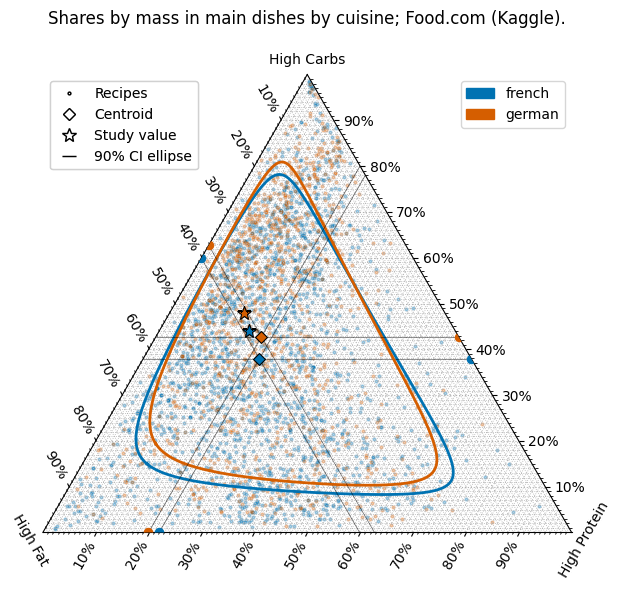

In [4]:
# plotting using mpltern library
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection="ternary")

# setup for axii
tirl.setup_ternary_axis(
    ax,
    major_step = 10, minor_step = 1,
    draw_grid = True,
    draw_subgrid = True,
    show_labels = True
)

ax.set_tlabel("High Carbs")
ax.set_llabel("High Fat")
ax.set_rlabel("High Protein")

# list the tags and their colours for plot
tags = ['french' , 'german']
# colors from okabe-ito palette
colors = ['#0072B2', '#D55E00']
          
# custom legend for countries
handles = []

for i, tag in enumerate(tags):
    handles.append( mpatches.Patch(color=colors[i], label=tag))

# attach legend to plot
leg_country_code = ax.legend(handles=handles, loc="best")
ax.add_artist(leg_country_code)


for i, tag in enumerate(tags):
    c = tirl.ternary_scatter_with_ilr_ellipse(
        ax,
        df,
        tag,
        comps=("carbs_perc", "fats_perc", "proteins_perc"),
        ilr_cols=("z1", "z2"),
        color=colors[i],
        s=4,
        alpha=0.3,
        level=0.90,
        n_fill=2,
        scatter=True,
        draw_crosshair=True,
        crosshair_linewidth=0.5,
        crosshair_alpha=0.6,
        ellipse = True
    )
    print(c['centroid_abc'])

# adding values for the nutrition composition from studies
# France (INCA2, adults): 44% carbs, ~39% fat,  17% protein
# x_1 = carb, x_2 = fat, x_3 = protein
ax.plot(
    0.44, 0.39, 0.17,
    marker = '*',
    markersize = 10,
    markerfacecolor = colors[0],
    markeredgecolor = 'black',
    markeredgewidth = 0.8
)

# Germany (NVS II, adults): ~45–49% carbs, ~35–38% fat, ~14–15% protein
ax.plot(
    0.48, 0.38, 0.14, # rounded values! for display only
    marker = '*',
    markersize = 10,
    markerfacecolor = colors[1],
    markeredgecolor = 'black',
    markeredgewidth = 0.8
)

# secondary legend for symbols
symbol_handles = [
    Line2D(
        [], [],
        marker='o',
        linestyle='None',
        markeredgecolor='k', markerfacecolor='none', markersize=2,
        label='Recipes'
    ),
    Line2D(
        [], [],
        marker='D',
        linestyle='None', 
        markeredgecolor='k', markerfacecolor='none', markersize=6,  
        label='Centroid'
    ),
    Line2D(
        [], [],
        marker='*',
        linestyle='None',
        markeredgecolor='k', markerfacecolor='none', markersize=10, 
        label='Study value'
    ),
    Line2D(
        [], [],
        marker='_',
        linestyle='None',
        markeredgecolor='k', markerfacecolor='none', markersize=10, 
        label='90% CI ellipse'
    ),
]

leg_symbols = ax.legend(
    handles=symbol_handles,
    title='',
    loc='upper left',
    frameon=True
)
ax.add_artist(leg_symbols)

ax.set_title(f"Shares by mass in main dishes by cuisine; Food.com (Kaggle).\n")
plt.tight_layout()
plt.show()

In [5]:
# save plot
filename = 'exports/MainDishes_byCuisine.png'
dpi = 300

fig.savefig(filename, dpi=dpi, bbox_inches="tight")

## simplified version of the plot for show case

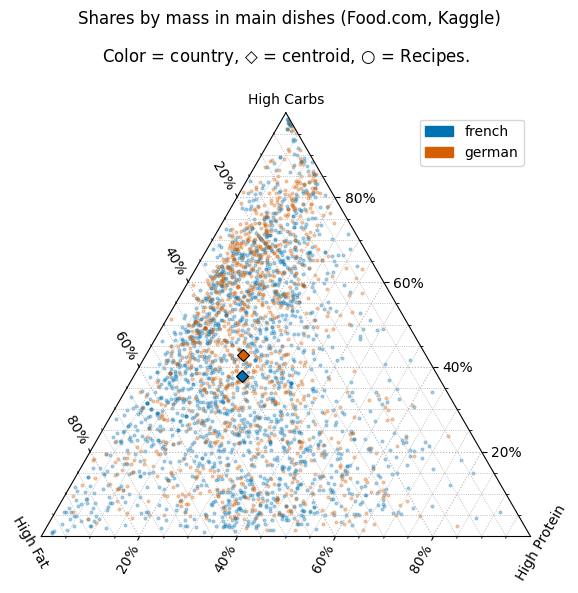

In [6]:
# plotting using mpltern library
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection="ternary")

# setup for axii
tirl.setup_ternary_axis(
    ax,
    major_step = 20, minor_step = 5, 
    draw_grid = True,
    draw_subgrid = True,
    show_labels = True
)

ax.set_tlabel("High Carbs")
ax.set_llabel("High Fat")
ax.set_rlabel("High Protein")

# list the tags and their colours for plot
tags = ['french' , 'german']
# colors from okabe-ito palette
colors = ['#0072B2', '#D55E00']
          
# custom legend for countries
handles = []

for i, tag in enumerate(tags):
    handles.append( mpatches.Patch(color=colors[i], label=tag))

# attach legend to plot
leg_country_code = ax.legend(handles=handles, loc="best")


for i, tag in enumerate(tags):
    tirl.ternary_scatter_with_ilr_ellipse(
        ax,
        df,
        tag,
        comps=("carbs_perc", "fats_perc", "proteins_perc"),
        ilr_cols=("z1", "z2"),
        color=colors[i],
        s=4,
        alpha=0.3,
        level=0.90,
        n_fill=3,
        scatter=True,
        draw_crosshair=False,
        ellipse = False
    )

fig.suptitle("Shares by mass in main dishes (Food.com, Kaggle)")
ax.set_title("Color = country, ◇ = centroid, $○$ = Recipes.\n")
plt.tight_layout()
plt.show()



In [7]:
# save plot
filename = 'exports/MainDishes_byCuisine_simplified.png'
dpi = 300

fig.savefig(filename, dpi=dpi, bbox_inches="tight")

## Plotting multiple cuisines

Cuisines differ greatly worldwide, however, the composition as reflected by the recipes on food.com does not. Most visible difference is protein percentage.

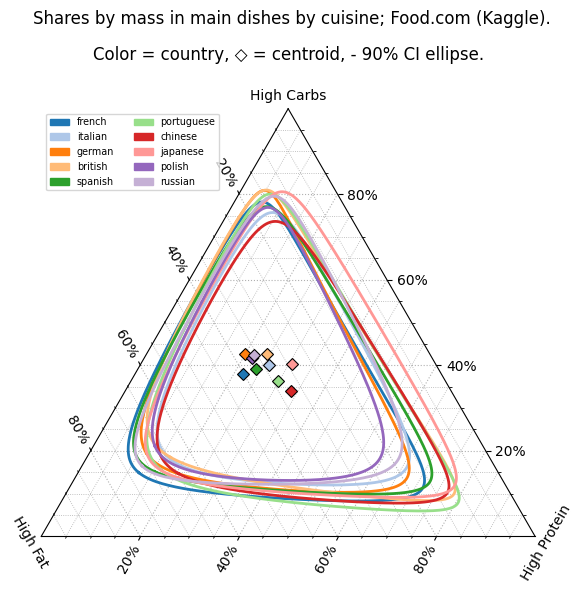

In [8]:
# plotting using mpltern library
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection="ternary")

# setup for axii
tirl.setup_ternary_axis(
    ax,
    major_step = 20, minor_step = 5, 
    draw_grid = True,
    draw_subgrid = True,
    show_labels = True
)

ax.set_tlabel("High Carbs")
ax.set_llabel("High Fat")
ax.set_rlabel("High Protein")
ax.grid(True, linestyle=":")


# list the tags and their colours for plot
tags = [
    'french' , 
    'italian',  
    'german',  
    'british',
    'spanish',
    'portuguese',
    'chinese',
    'japanese', 
    'polish',
    'russian',
]
cols = [ 
    "#1F77B4", "#AEC7E8", "#FF7F0E", "#FFBB78", "#2CA02C",
    "#98DF8A", "#D62728", "#FF9896", "#9467BD", "#C5B0D5",
    "#8C564B", "#C49C94", "#E377C2", "#F7B6D2", "#7F7F7F",
    "#C7C7C7", "#BCBD22", "#DBDB8D", "#17BECF", "#9EDAE5"
]

# Labels
# x_1 = carb, x_2 = fat, x_3 = protein
# custom legend
handles = []

for i, tag in enumerate(tags):
    handles.append( mpatches.Patch(color=cols[i], label=tag))

ax.legend(handles=handles, loc="upper left", ncol =2, fontsize = 'x-small')

for i, tag in enumerate(tags):
    tirl.ternary_scatter_with_ilr_ellipse(
        ax,
        df,
        tag,
        comps=("carbs_perc", "fats_perc", "proteins_perc"),
        ilr_cols=("z1", "z2"),
        color=cols[i],
        s=4,
        alpha=0.3,
        level=0.90,
        n_fill=300,
        scatter=False,
        draw_crosshair=False,
        ellipse = True
    )


fig.suptitle('Shares by mass in main dishes by cuisine; Food.com (Kaggle).')
ax.set_title('Color = country, ◇ = centroid, - 90% CI ellipse.\n')

plt.tight_layout()
plt.show()



In [9]:
# save plot
filename = 'exports/MainDishes_byCuisine_selection_simplified.png'
dpi = 300

fig.savefig(filename, dpi=dpi, bbox_inches="tight")